In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat = loadmat("dado3.mat")
X = mat["X"]

### Plotting 100 random pictures

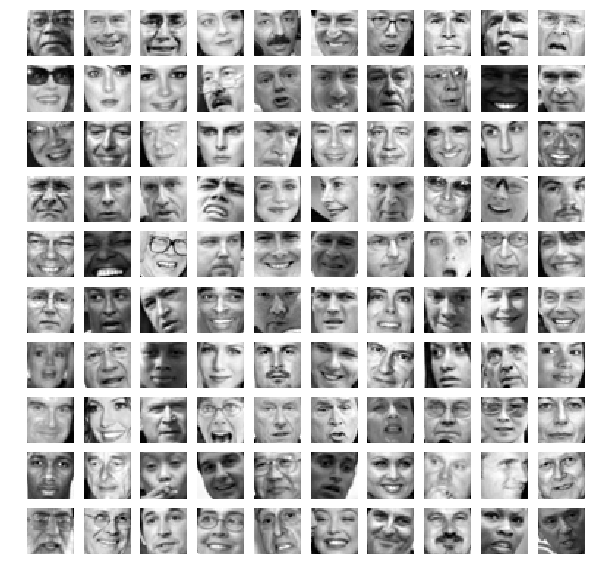

In [3]:
rand = np.random.randint(0,5000,100)

fig,axis = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[rand[i*10+j],:].reshape(32,32,order="F"),cmap=plt.cm.gray)
        axis[i,j].axis("off")

In [4]:
# Normalize data

def featureNormalize(X):
    #axis=0 means by column
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    
    X_norm = (X-mu)/sigma
    
    return X_norm,mu,sigma

In [5]:
from numpy.linalg import svd

In [6]:
# SVD decomposition for sigma

def PCA(X):
    m,n = X.shape[0],X.shape[1]
    
    sigma = (1/m)*X.T@X
    U,S,V=svd(sigma)
    return U,S,V

In [7]:
X_norm,mu,std = featureNormalize(X)
U,S,V = PCA(X_norm)

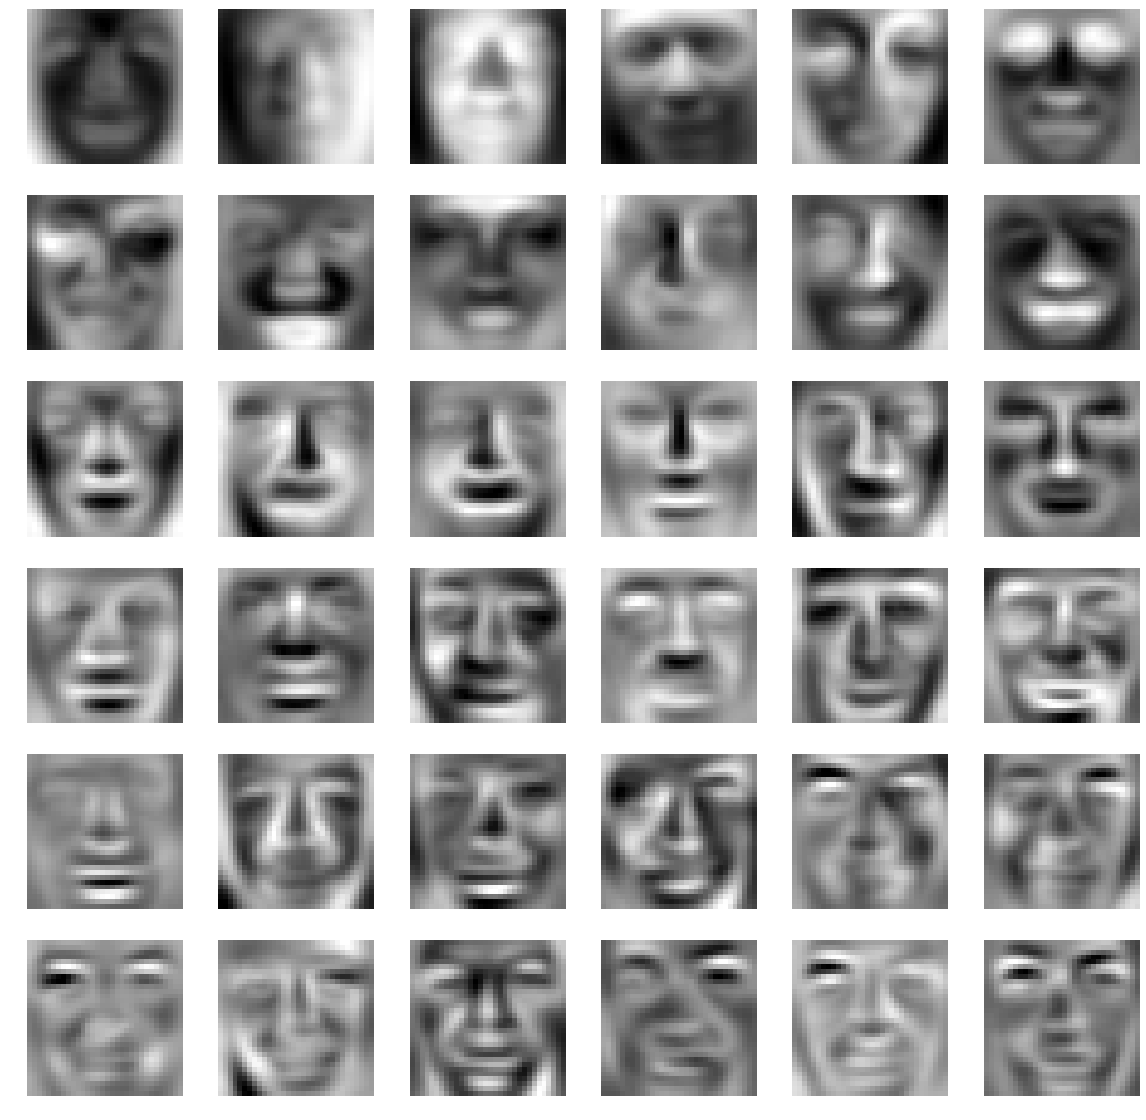

In [8]:
# Plotting eigenfaces

fig,axis = plt.subplots(6,6,figsize=(20,20))
for i in range(6):
    for j in range(6):
        axis[i,j].imshow(U[:,i*6+j].reshape(32,32,order="F"),cmap=plt.cm.gray)
        axis[i,j].axis("off")

In [9]:
# U reduced to 100 principal components

U_red = U[:,0:100]

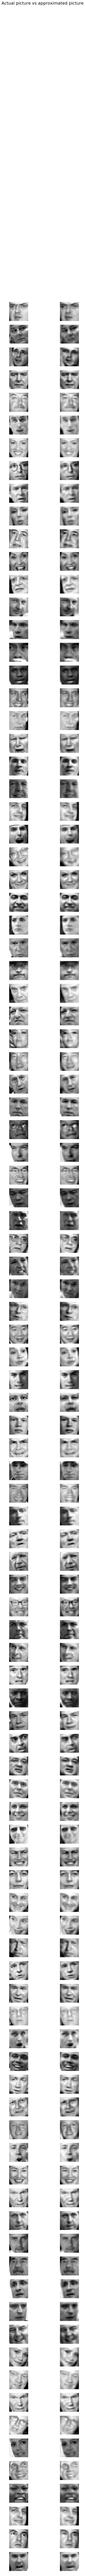

In [11]:
# Actual vs approximated picture

n_images = 100
rand2 = np.random.randint(0,5000,n_images)


fig,axis = plt.subplots(n_images,2,figsize=(8,200),sharex=True, sharey=True)
plt.suptitle('Actual picture vs approximated picture', size=20)

for i in range(n_images):
    z = np.dot((U_red.T),X[rand2[i],:])
    axis[i,0].imshow(X[rand2[i],:].reshape(32,32,order="F"),cmap=plt.cm.gray)
    axis[i,1].imshow(np.dot(U_red,z).reshape(32,32,order="F"),cmap=plt.cm.gray)
    axis[i,0].axis("off")
    axis[i,1].axis("off")

### Optimal Number of components

In [12]:
def NumberComponents(S):
    n = S.shape[0]
    mi = n
    s = sum(S)
    for i in range(n):
        test = sum(S[0:i+1])/s
        if test >=0.99:
            mi = i+1
            break
    return mi

In [13]:
num = NumberComponents(S)
print(' The optimal number of principal components is %i'%num)

 The optimal number of principal components is 335


In [14]:
U_red_opt =  U[:,0:num]

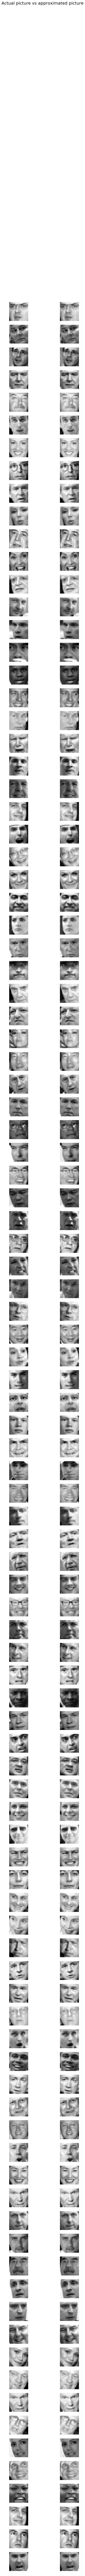

In [17]:
# Actual vs approximated picture according to optimal number of components.


fig,axis = plt.subplots(n_images,2,figsize=(8,200))
plt.suptitle('Actual picture vs approximated picture', size=20)

for i in range(n_images):
    z = np.dot((U_red_opt.T),X[rand2[i],:])
    axis[i,0].imshow(X[rand2[i],:].reshape(32,32,order="F"),cmap=plt.cm.gray)
    axis[i,1].imshow(np.dot(U_red_opt,z).reshape(32,32,order="F"),cmap=plt.cm.gray)
    axis[i,0].axis("off")
    axis[i,1].axis("off")